# IMDB parser

Read the list of movies for an actor from IMDB, using imdbpy library.

In [104]:
import imdb
ia = imdb.IMDb()

The actor used for this example is Robert De Niro

In [105]:
actor_name = 'Robert De Niro'
actor = ia.search_person(actor_name)
actor = actor[0]
ia.update(actor)

The headshot is taken from IMDB and showed below.

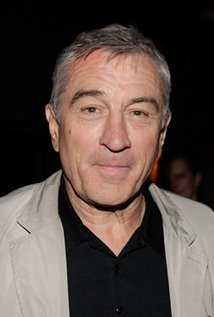

In [106]:
from IPython.display import Image
headshot = deniro['headshot']
Image(headshot)

In [141]:
films = actor['actor'] # get the films as actor

id_values = ['id', 'title', 'rating', 'year', 'kind']
data = []
for film in films:
    ia.update(film)
    #if film.get('rating') is not None: #take only movies with a rating
    print film
    data.append([film.getID()]+[film.get(id_value) for id_value in id_values[1:]])

Dirty Grandpa
Hands of Stone
Joy
The Intern
Bus 657
Honeymoon with Harry
The Comedian
The Bag Man
Grudge Match
American Hustle
Last Vegas
The Family
Killing Season
The Big Wedding
Silver Linings Playbook
Freelancers
Being Flynn
Red Lights
New Year's Eve
Killer Elite
Limitless
Manuale d'am3re
Little Fockers
Stone
Machete
Everybody's Fine
Righteous Kill
What Just Happened
Stardust
The Good Shepherd
Arthur et les Minimoys
Hide and Seek
The Bridge of San Luis Rey
Meet the Fockers
Shark Tale
Godsend
Analyze That
City by the Sea
Showtime
The Score
15 Minutes
Meet the Parents
Men of Honor
The Adventures of Rocky & Bullwinkle
Flawless
Analyze This
Ronin
Great Expectations
Jackie Brown
Wag the Dog
Cop Land
Marvin's Room
Sleepers
The Fan
Heat
Casino
Les cent et une nuits de Simon Cinéma
Frankenstein
A Bronx Tale
This Boy's Life
Mad Dog and Glory
Night and the City
Mistress
Cape Fear
Backdraft
Guilty by Suspicion
Awakenings
Goodfellas
Stanley & Iris
We're No Angels
Jacknife
Midnight Run
The Untou

In [142]:
data[0]

['1860213', u'Dirty Grandpa', None, 2016, u'movie']

In [146]:
import pandas as pd
#title_series = pd.Series(title)
#rating_series = pd.Series(rating)
#year_series = pd.Series(year)
#data_frame = pd.DataFrame(title,rating)#,year)
data_frame = pd.DataFrame(data,columns=id_values)
data_frame_movies = data_frame[data_frame['kind'] == 'movie']
data_frame_movies.sort('rating',ascending=False).head(10)

,id,title,rating,year,kind
86,0071562,The Godfather: Part II,9.1,1974,movie
67,0099685,Goodfellas,8.7,1990,movie
77,0087843,Once Upon a Time in America,8.4,1984,movie
85,0075314,Taxi Driver,8.4,1976,movie
80,0081398,Raging Bull,8.3,1980,movie
54,0113277,Heat,8.3,1995,movie
55,0112641,Casino,8.2,1995,movie
81,0077416,The Deer Hunter,8.2,1978,movie
75,0088846,Brazil,8.0,1985,movie
72,0094226,The Untouchables,8.0,1987,movie


In [164]:
%pylab inline
#import matplotlib.pylab as plt
data_pivot = data_frame.pivot_table(index='year',columns='kind',values='rating')
data_pivot.sort(ascending=False).head()

Populating the interactive namespace from numpy and matplotlib


kind,movie,tv movie,tv series
year,,,
2016,NaN,NaN,NaN
2015,NaN,NaN,NaN
2014,5.30,NaN,NaN
2013,6.30,NaN,NaN
2012,6.25,NaN,NaN


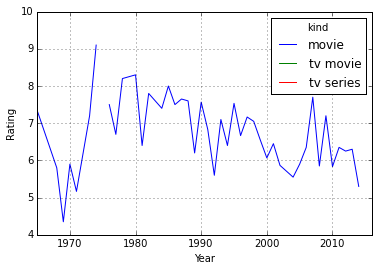

In [160]:
plot = data_pivot.plot()
plt.xlabel('Year')
plt.ylabel('Rating')
plt.show()

In [153]:
# export data on csv
data_frame.to_csv(actor['name'].replace(' ','_')+'.csv', encoding='utf-8')

Robert_De_Niro.csv


In [134]:
n=actor['name'].split()

name = actor['name']
name.replace(' ','_')

u'Robert_De_Niro'

In [ ]:
actor['name'].replace

In [137]:
film

<Movie id:0809488[http] title:_"The Godfather: A Novel for Television" (1977)_>

In [140]:
film.key2infoset
film['kind']

u'tv series'

In [174]:
dyear = data_frame_movies.groupby( (data_frame_movies['year']//10)*10)
#dyear = data_frame_movies.ix['1980']
dyear.head()

,id,title,rating,year,kind
0,1860213,Dirty Grandpa,NaN,2016,movie
1,1781827,Hands of Stone,NaN,2016,movie
2,2446980,Joy,NaN,2015,movie
3,2361509,The Intern,NaN,2015,movie
4,3276924,Bus 657,NaN,2015,movie
5,0416818,Honeymoon with Harry,NaN,NaN,movie
6,1967614,The Comedian,NaN,NaN,movie
25,0780511,Everybody's Fine,7.2,2009,movie
26,1034331,Righteous Kill,6.0,2008,movie
27,0486674,What Just Happened,5.7,2008,movie


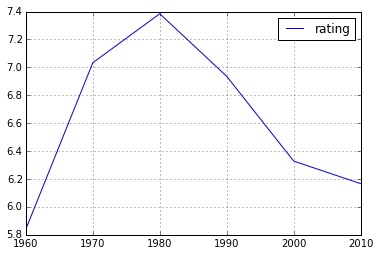

In [187]:
def floor_decade(year):
    "Takes a date. Returns the decade."
    return (year // 10) * 10

#data_frame_movies
data_per_year = data_frame.set_index('year')
data_per_year.groupby(floor_decade).mean().plot()